In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin 
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.preprocessing import StandardScaler

# Comparison of Classifiers for Student Performance Prediction
The objective in this assignment is to compare the performance of different classifiers on the Student Performance dataset. What is the best algorithm for the dataset? 

In [234]:
student_data = pd.read_csv('data/data.csv',sep=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Describe the dataset:
This dataset is sourced from a higher education institution and contains information about students enrolled in various undergraduate degree programs. It includes features that provide personal details about the students, such as their marital status, parents education levels, and gender.

Additionally, the dataset includes academic-related information, including the students fields of study, academic performance, and attendance records.

The target variable indicates the state of each student at the end of their course, classifying them as a dropout, still enrolled, or graduated.

The purpose of this dataset is to identify potential patterns between the features and the target variable, aiming to understand the factors that influence whether students drop out, continue their studies, or graduate based on their academic paths and personal and family backgrounds.

From the UCI link where this data is from it looks like they already have performed some preprocessing of the data: removed unexplainable outliers, missing values and anomolies. so we don't have to think about this. The categorical values in the features are already encoded. They are encoded from 1 to however many categories there are. 

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

# encoding the target
makes it easier to use explorary functions on the wholedataset

In [235]:
label_encoder = LabelEncoder()

student_data['Target'] = label_encoder.fit_transform(student_data['Target'])

student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# exploratory analysis of the dataset

first we can look at the distribution of the values in the features and target.

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


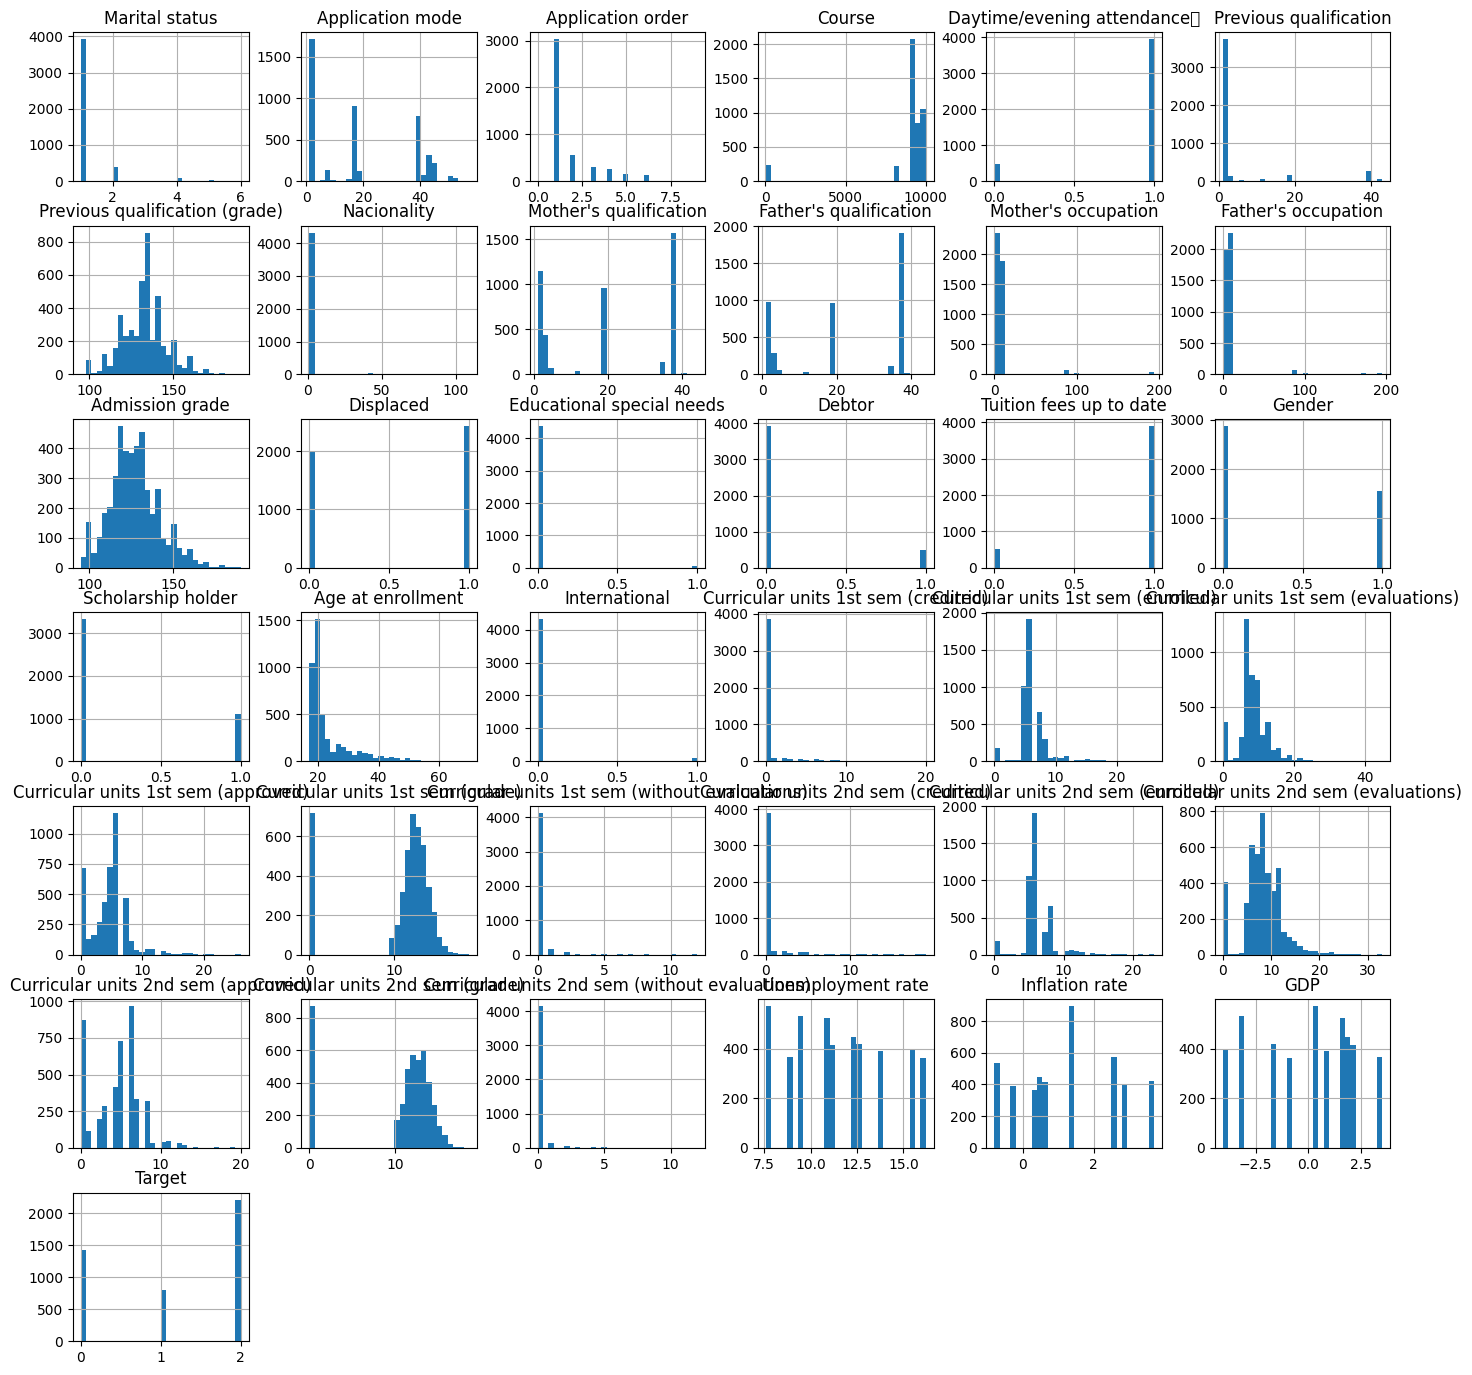

In [236]:
student_data.hist(bins=30, figsize=(17, 17))

# target distribution


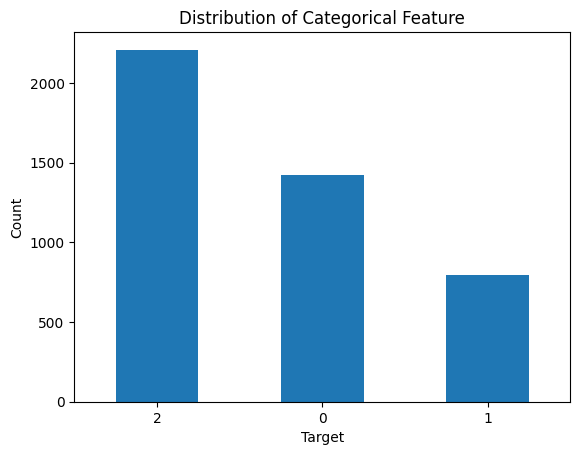

In [237]:
student_data['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

looking at the distribution of the data we can tell what kind of Algortihms it is best to use.



features: the feature distribution is mixed, there are some normally distributed feautres and some binary. Testing with both naive bayes and bernoulli naive bayes, can be smart. Maybe a combined model could also work. Decision tree works well with both normally distributed and binary data.
looking further into the distirbution we can see that normalization and scaling the data can be benefitial. 

target: There is some imbalance here, but there is still enough representation of all categories, so i don't think this will be a problem.

# looking at the information of the dataset

In [238]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Correlation analysis:

In [239]:
student_corr = student_data.corr()
student_corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.0215

looking at the correlation between the variables we can see that some of them have very high correlation.  
the correlations we need to consider:  
international and nationality,   
mother and fathers occupation,
and all of the columns for Curricular units 1st sem and Curricular units 2nd sem have some sort of correlation to each other.

# pre-processing of data after exploratory analysis:
i will be using pipelines to optimize the transformation of the dataset. Every change i make will be put in the pipe.

# Scaling the data
Scaling the data is beneficial because it ensures that all features are within a consistent, smaller range, and are on an equal footing in terms of scale. This way, features with larger numerical values won't dominate the learning process, allowing the model to treat all features with equal importance.

In [240]:
scaler = StandardScaler()

# dimention reduction for the correlated columns
we will be using feature engineering to merge the columns with high correlation together by using PCA.
this will be benefitial for the dataset because we can reduce the dimentionality without losing on important information. This will make it easier for the models to work with the data and to capture all the important information from the dataset

In [241]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

we are going to combine all the curricular columns, which are a lot. We need to find the best number of columns to combine them into. underneath it looks like a dimention of 7 will give us enough cumulative variance while still reducing the dimentionality.

[0.61612754 0.80979723 0.89631152 0.93060861 0.95837549 0.97615779
 0.9880642  0.99379723 0.99725798 0.99906489 1.        ]


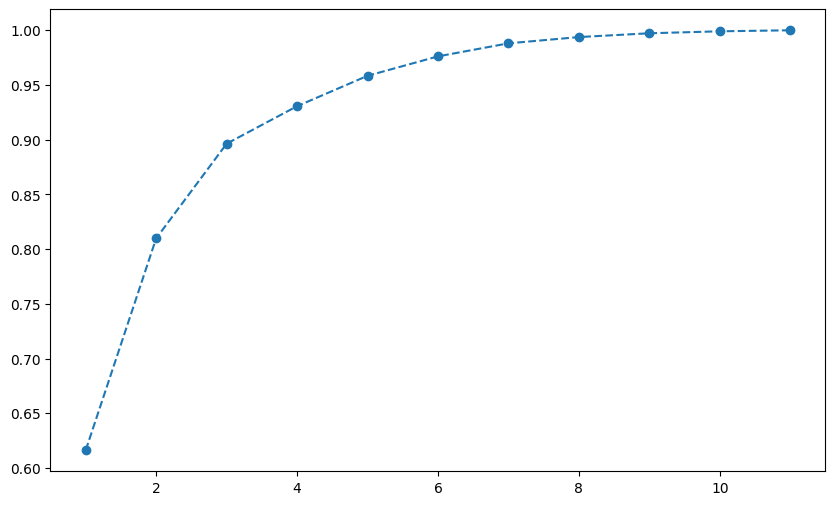

In [242]:
pca = PCA()
number_of_pca = pca.fit_transform(student_data.iloc[:, 21:32])
number_of_pca

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.show()

The other columns i will combine to one, because they only contain two

In [243]:
pca = ColumnTransformer([
     ("pca1", PCA(1), [7, 20]),        # international and nationality
     ("pca2", PCA(1), [10, 11]),       # mother and fathers occupation
     ("pca3", PCA(7), slice(21, 33))   # Curricular units 1st sem (credited) to Curricular units 2nd sem (grade)
     ])

# Comebine everything in the pipe
this will make it easier to test on the untuched and altered data, because the alterations only involve the pipe. I will use the function below to create a model with the altered data that also can be used like a regular model in my grid search function

In [244]:
def pipe_normalized_pca(model):
    return Pipeline([('normalized',normalized), ('scaler', scaler), ('pca', pca), ('classifier', model)])

# Split the dataset
i chose a 80% train_val set and 20% testing set. This will ensure that i have enough data for grid search and again split the data into train and validation. I will also have enough data at the end for testing with 20% test data

In [245]:
features = student_data.drop('Target', axis=1)
targets = student_data['Target']

train_val_features, test_features, train_val_targets, test_targets = train_test_split(features, targets, test_size=0.2)

# hyperparameter tuning to find the best possible classifiers
i will be using nested cross validation for each algortihm that i am going to test, to make sure that i got the best combination of parameters. to evaluate during the tuning process i will be looking at accuracy, precision, recall, the f-measure and roc auc.

i will be first trying singular models, an ensembeled model and a combination to see if a combination of models can give me a better result. 

i wil also be testing on the untuched data to see if the preprocessing made the data better better or not.

i will do the training process over two rounds, so i can test five models with few parameters. then i will test the two best models from round one again with more parameters, to make sure i got the best model. This dataset has a lot more data, so it will be more effective to test more models at the beginning with fewer parameters, then go in depth with the best ones.

# method to evaluate the models
this will be used in the grid search method, and to evaluate the models at the end  
  
what we need to look for when evaluating this model:  
this model is going to predict if someone will dropout, graduate or continue in school.
it is important to classify all of these correctly, so f1 is the most important evaluator same with roc auc.


In [246]:

def evaluate(estimator, X, y):
    probabilities = estimator.predict_proba(X)
    prediction_indices = np.argmax(probabilities, axis=1)
    predictions = estimator.classes_.take(prediction_indices, axis=0)

    return{
        'accuracy': accuracy_score(y, predictions), 
        'precision': precision_score(y, predictions, average='weighted'), 
        'recall': recall_score(y, predictions, average='weighted'), 
        'f1': f1_score(y, predictions, average='weighted'), 
        'roc_auc': roc_auc_score(y, probabilities, multi_class="ovr")
    }

# Nested grid search model
This is the best way to find the best model. 
this gridsearch will run an outer loop five times with different parts of the train-val data, then split this data again in the inner loop(four times) which is going to do the grid search. The grid search will then split the part of the data it got into train and validate, and return the best model
  
this method will return a list of five models, for each grid search the best model will be added to this list. it will return the cv_results which contains all the information of each loop of the grid search. The method also return the scores, same as the evaluate function
the models will be returned by the best accuracy, precision_weighted, recall_weighted, f1_weighted, roc_auc_ovr_weighted and refitted so the best f1_weighted is returned

In [247]:
def find_best_models(model, dt_params):
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr_weighted']

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=13)

    dt_cv_results = []
    dt_estimators = []
    dt_test_scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
    }

    for (train_index, test_index) in list(outer_cv.split(train_val_features, train_val_targets)):

        dt_grid = GridSearchCV(model, dt_params, cv=inner_cv, scoring=metrics, refit='f1_weighted',return_train_score=True)
        dt_grid.fit(train_val_features.iloc[train_index], train_val_targets.iloc[train_index])

        cv_results = pd.DataFrame(dt_grid.cv_results_)
        dt_cv_results.append(cv_results)
        dt_estimators.append(dt_grid.best_estimator_)

        evaluation = evaluate(dt_grid, train_val_features.iloc[test_index], train_val_targets.iloc[test_index])
        dt_test_scores['accuracy'].append(evaluation['accuracy'])
        dt_test_scores['precision'].append(evaluation['precision'])
        dt_test_scores['recall'].append(evaluation['recall'])
        dt_test_scores['f1'].append(evaluation['f1'])
        dt_test_scores['roc_auc'].append(evaluation['roc_auc'])
    return dt_estimators, dt_cv_results, dt_test_scores



# first round of testing models
for the first round of testing models i will be trying a smaller range of paramtes, so i can try many models without getting a too large runtime

# Singular models
first i will be testing normal singular models

# Decision tree with original dataset
i tried to test with the most important parameters, which i would say is max_depth because this will mostly removes overfitting and criterion which measures the quality of the split

In [248]:
dt_params = {
        'criterion': ['gini', 'entropy'], 
        'max_depth': range(1,5)
    }
best_models_decision_tree, cv_results, test_scores = find_best_models(DecisionTreeClassifier(), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

seeing which model occurs the most:  
DecisionTreeClassifier(max_depth=4) is the best for each round

In [282]:
print(best_models_decision_tree)

[DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4)]


# Decision tree with the altered data

In [283]:
dt_params = {
        'classifier__criterion': ['gini', 'entropy'], 
        'classifier__max_depth': range(1,5)
    }
best_models_decision_tree_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(DecisionTreeClassifier()), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# 

the best model is DecisionTreeClassifier(criterion='entropy', max_depth=4), because this occurs most often in the list below

In [284]:
print(best_models_decision_tree_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=7),
                                                  slice(21, 33, None))])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))]), Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                   

# GaussianNB with original dataset

In [252]:
nb_params = {
        'var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb, cv_results, model_scores = find_best_models(GaussianNB(), nb_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

the best model seems to be GaussianNB(var_smoothing=1e-08)

In [253]:
print(best_models_nb)

[GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08)]


# GaussianNB with altered data

In [285]:
nb_params = {
        'classifier__var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(GaussianNB()), nb_params)

the best model is GaussianNB(var_smoothing=0.001) as it occurs most often

In [286]:
print(best_models_nb_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=7),
                                                  slice(21, 33, None))])),
                ('classifier', GaussianNB(var_smoothing=0.0001))]), Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
               

# Bernoulli model with original dataset

In [256]:
b_params = {
        'alpha': np.logspace(-4, 0, 5)
    }
best_models_b, cv_results, model_scores = find_best_models(BernoulliNB(), b_params)

best model is BernoulliNB(alpha=0.0001) every time

In [257]:
print(best_models_b)

[BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001)]


# Bernoulli with altered dataset

In [258]:
b_params = {
        'classifier__alpha': np.logspace(-4, 0, 5)
    }
best_models_b, cv_results, model_scores = find_best_models(pipe_normalized_pca(BernoulliNB()), b_params)

the best model is BernoulliNB(alpha=0.0001)

In [259]:
print(best_models_b)

[Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=7),
                                                  slice(21, 33, None))])),
                ('classifier', BernoulliNB())]), Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                  

# results of the best singular models:


In [288]:
print("decision tree with original data: ")
decision_tree_best = DecisionTreeClassifier(max_depth=4).fit(train_val_features, train_val_targets)
print(evaluate(decision_tree_best, test_features, test_targets))
print("Decision tree with altered data")
decision_pipe = pipe_normalized_pca(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe, test_features, test_targets))

print()
print("Naive bayes with original data")
naive_bayes_best = GaussianNB(var_smoothing=1e-08).fit(train_val_features, train_val_targets)
print(evaluate(naive_bayes_best, test_features, test_targets))
print("Naive bayes with altered data")
nb_pipe_1 = pipe_normalized_pca(GaussianNB(var_smoothing=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_1, test_features, test_targets))
print()

print("BernoulliNB with original data")
best_b = BernoulliNB(alpha=0.0001).fit(train_val_features, train_val_targets)
print(evaluate(best_b, test_features, test_targets))
print("BernoulliNB with altered data")
best_b_pipe = pipe_normalized_pca(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))







decision tree with original data: 
{'accuracy': 0.7389830508474576, 'precision': 0.7412336671497067, 'recall': 0.7389830508474576, 'f1': 0.7259110791143315, 'roc_auc': 0.8500497502053278}
Decision tree with altered data
{'accuracy': 0.7016949152542373, 'precision': 0.6965918626659369, 'recall': 0.7016949152542373, 'f1': 0.6939601614097449, 'roc_auc': 0.8220684848447002}

Naive bayes with original data
{'accuracy': 0.6870056497175141, 'precision': 0.673700046668709, 'recall': 0.6870056497175141, 'f1': 0.6755825651409432, 'roc_auc': 0.7973333887298338}
Naive bayes with altered data
{'accuracy': 0.6576271186440678, 'precision': 0.6486909494938041, 'recall': 0.6576271186440678, 'f1': 0.6493539554287435, 'roc_auc': 0.7868748828659564}

BernoulliNB with original data
{'accuracy': 0.6610169491525424, 'precision': 0.6310986783240022, 'recall': 0.6610169491525424, 'f1': 0.6245339467405371, 'roc_auc': 0.7471737579057658}
BernoulliNB with altered data
{'accuracy': 0.6655367231638418, 'precision':

# Ensembeled models
decision tree gave very good results in the singular model test, so i think random forest classifer could be even better

# random forest classifier with untuched data

In [261]:
rfc_params = {
        'n_estimators': [80, 90, 100]
    }
best_models_rfc, cv_results, model_scores = find_best_models(RandomForestClassifier(), rfc_params)

the best model is RandomForestClassifier(n_estimators=80)

In [262]:
print(best_models_rfc)

[RandomForestClassifier(n_estimators=80), RandomForestClassifier(n_estimators=80), RandomForestClassifier(n_estimators=80), RandomForestClassifier(n_estimators=90), RandomForestClassifier(n_estimators=80)]


# random forest classifier with altered data

In [264]:
rfc_params = {
        'classifier__n_estimators': [80, 90, 100]
    }
best_models_rfc_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(RandomForestClassifier()), rfc_params)

the best model is RandomForestClassifier() which occurs the most

In [265]:
print(best_models_rfc_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=7),
                                                  slice(21, 33, None))])),
                ('classifier', RandomForestClassifier())]), Pipeline(steps=[('normalized', MinMaxScaler()), ('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                       

# results of the ensembeled method

In [292]:
print("random forest with original data")
best_rfc = RandomForestClassifier(n_estimators=80).fit(train_val_features, train_val_targets)
print(evaluate(best_rfc,test_features, test_targets))
print("random forst with altered data")
rfc = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))

random forest with original data
{'accuracy': 0.7887005649717514, 'precision': 0.7790596370747223, 'recall': 0.7887005649717514, 'f1': 0.775633759454112, 'roc_auc': 0.8913529411184706}
random forst with altered data
{'accuracy': 0.7129943502824859, 'precision': 0.6984755496590147, 'recall': 0.7129943502824859, 'f1': 0.70261951433512, 'roc_auc': 0.8438112569784652}


# Combinding models
i will try to combine two models, to see if i can get even better results
combing naive bayes and bernoulliNB made the most sense looking at the distribution of the data

In [267]:
class CombinedNB(ClassifierMixin, BaseEstimator):

    def __init__(self, gaussian=GaussianNB(), gaussian_features=None, bernoulli=BernoulliNB(), bernoulli_features=None):
        
        self.gaussian_features = gaussian_features
        self.bernoulli_features  = bernoulli_features
        
        self.gaussian = gaussian 
        self.bernoulli = bernoulli 

    def fit(self, X, y):
        self.gaussian.fit(X[self.gaussian_features], y)
        self.bernoulli.fit(X[self.bernoulli_features], y)
        self.classes_ = self.gaussian.classes_
       
    def predict(self, X):
        predict_proba = self.predict_proba(X)
        return np.argmax(predict_proba, axis=1)

    def predict_proba(self, X):
        gaussian_proba = self.gaussian.predict_proba(X[self.gaussian_features])
        bernoulli_proba = self.bernoulli.predict_proba(X[self.bernoulli_features])
        
        proba = gaussian_proba * bernoulli_proba
        
        
        proba = proba / proba.sum(axis=1, keepdims=True)
        
        return proba


In [268]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

i will add all the binary data to the bernoulli model, and the rest to the guassian

In [269]:
# all binary columns
bernoulli_features = ['Daytime/evening attendance\t', 'Displaced', 
                      'Educational special needs', 'Debtor', 'Tuition fees up to date',
                      'Gender', 'Scholarship holder', 'International']
# the rest
guassian_features = list(filter(lambda x: x not in bernoulli_features, train_val_features.columns))

combined_params = {
        'gaussian__var_smoothing':np.logspace(-2, -12, num=11),
        'bernoulli__alpha': np.logspace(-4, 0, 5)
    }
combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features)
combined


CombinedNB(bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualification',
                              'Previous qualification (grade)', 'Nacionality',
                              "Mother's qualification",...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (evaluations)',
                              'Curricular units 2nd sem (approved)',
                              'Curricular units 2nd sem (grade)',
                              'Curricular units 2nd sem (without evaluations)',
                              'Unemployment rate', 'Inflation rate', 'GDP'])

combined method with the original dataset

In [270]:
best_combined_models, cv, scores = find_best_models(combined, combined_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

the best combined model consists of GaussianNB(var_smoothing=1e-07) and BernoulliNB(alpha=0.0001)

In [271]:
print(best_combined_models)

[CombinedNB(bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian=GaussianNB(var_smoothing=1e-07),
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualification',
                              'Previous qualification (grade...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (ev

# evaluating the combined model

In [ ]:
best_combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features, gaussian=GaussianNB(var_smoothing=1e-07), bernoulli=BernoulliNB(alpha=0.01))
best_combined.fit(train_val_features, train_val_targets)
evaluate(best_combined, test_features, test_targets)

{'accuracy': 0.6813559322033899,
 'precision': 0.661004842615012,
 'recall': 0.6813559322033899,
 'f1': 0.6602292037620643,
 'roc_auc': 0.7965357664385562}

# combined method with altered data
this was very trick to do, considering that i had to split my dataset between two models before

# all the results from round one:


In [294]:
print("random forest with original data")
best_rfc = RandomForestClassifier(n_estimators=80).fit(train_val_features, train_val_targets)
print(evaluate(best_rfc,test_features, test_targets))
print("random forst with altered data")
rfc = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))

print()
print("Naive bayes with original data")
naive_bayes_best = GaussianNB(var_smoothing=1e-08).fit(train_val_features, train_val_targets)
print(evaluate(naive_bayes_best, test_features, test_targets))
print("Naive bayes with altered data and var smooting 05")
nb_pipe = pipe_normalized_pca(GaussianNB(var_smoothing=1e-05)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe, test_features, test_targets))
print("Naive bayes with altered data and var smooting 01")
nb_pipe_1 = pipe_normalized_pca(GaussianNB(var_smoothing=1e-01)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_1, test_features, test_targets))
print()

print("BernoulliNB with original data")
best_b = BernoulliNB(alpha=0.0001).fit(train_val_features, train_val_targets)
print(evaluate(best_b, test_features, test_targets))
print("BernoulliNB with altered data")
best_b_pipe = pipe_normalized_pca(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))
print()

print("Random forest with original data")
rfc = RandomForestClassifier().fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))
print("Random forest with altered data")
rfc = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))
print()

print("combined naive bayes and BernoulliNB")
best_combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features, gaussian=GaussianNB(var_smoothing=1e-07), bernoulli=BernoulliNB(alpha=0.01))
best_combined.fit(train_val_features, train_val_targets)
evaluate(best_combined, test_features, test_targets)


random forest with original data
{'accuracy': 0.7830508474576271, 'precision': 0.7762338419862465, 'recall': 0.7830508474576271, 'f1': 0.7733528300885723, 'roc_auc': 0.8934102436152253}
random forst with altered data
{'accuracy': 0.7163841807909604, 'precision': 0.7069032627861338, 'recall': 0.7163841807909604, 'f1': 0.7082413377353548, 'roc_auc': 0.8430830281940908}

Naive bayes with original data
{'accuracy': 0.6870056497175141, 'precision': 0.673700046668709, 'recall': 0.6870056497175141, 'f1': 0.6755825651409432, 'roc_auc': 0.7973333887298338}
Naive bayes with altered data and var smooting 05
{'accuracy': 0.6576271186440678, 'precision': 0.6486909494938041, 'recall': 0.6576271186440678, 'f1': 0.6493539554287435, 'roc_auc': 0.7868726156769257}
Naive bayes with altered data and var smooting 01
{'accuracy': 0.6225988700564972, 'precision': 0.5987388333712104, 'recall': 0.6225988700564972, 'f1': 0.5915764172121788, 'roc_auc': 0.7931680942263579}

BernoulliNB with original data
{'accura

{'accuracy': 0.6813559322033899,
 'precision': 0.661004842615012,
 'recall': 0.6813559322033899,
 'f1': 0.6602292037620643,
 'roc_auc': 0.7965357664385562}

# second round of finding the best models
for the second round i will take the best models from round one and go more in depth with the parameters. i will make sure that i get the best parameters
It was hard to fint the best model, since all of them had very close results, but overall the best results were from these two models:  
  
random forest classifier with the original dataset and Random forest with original data

we will be trying with many more parameters:
the run time got very high for randomforest, so i couldnt test that many parameters, but from the graphs underneath it looks like we got clear peeks from the parameters


In [320]:
rfc_params = {
    'n_estimators': [90, 100, 110],
    'max_depth': [20 ,22, 25, 27],
    'min_samples_split': [2, 5, 7]  
}
best_models_rfc, cv_results, model_scores = find_best_models(RandomForestClassifier(), rfc_params)

In [318]:
print(cv_results)

[    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.377460      0.021044         0.034236        0.008757   
1        0.381333      0.028019         0.033912        0.001461   
2        0.432992      0.042559         0.030906        0.003214   
3        0.333009      0.039701         0.032162        0.005852   
4        0.387870      0.044041         0.030106        0.002727   
5        0.393277      0.074299         0.024073        0.007955   
6        0.324240      0.033782         0.031544        0.004937   
7        0.343219      0.026060         0.034159        0.003065   
8        0.405508      0.021478         0.033473        0.005411   
9        0.296565      0.021972         0.034238        0.011004   
10       0.353496      0.010851         0.030463        0.003933   
11       0.382836      0.027479         0.028646        0.009618   
12       0.292128      0.013279         0.020409        0.008088   
13       0.331536      0.027342         0.02589

underneath you can see how the different parameters i have choosen have performed. the n_estimators is the best at the end, but i though adding higher numbers of estimators would make the run time to high so i stopped there. min sample split is very flat dosen't make a big difference. max depth has a clear peek at 

C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\2921074383.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\2921074383.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_n_estimators', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\2921074383.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')


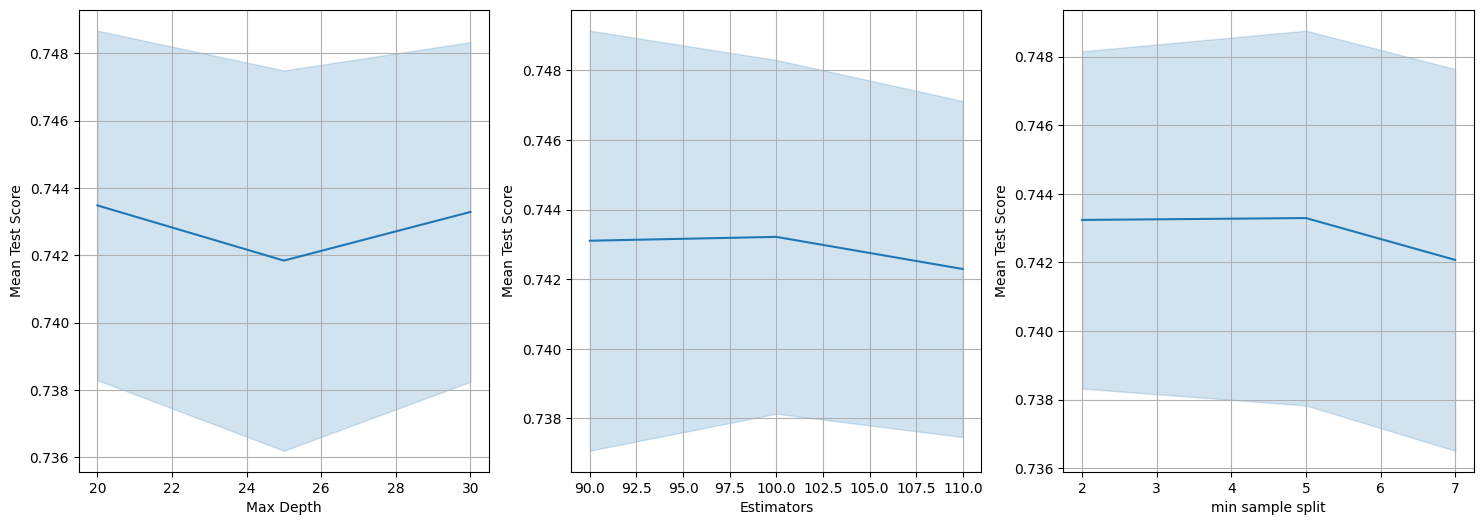

In [319]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 3, 2)
sb.lineplot(data=cv_results_df, x='param_n_estimators', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Estimators')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 3, 3)
sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('min sample split')
plt.ylabel('Mean Test Score')
plt.grid()

the mest model: RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90) 


In [297]:
print(best_models_rfc)

[RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=110), RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90), RandomForestClassifier(max_depth=15, n_estimators=110), RandomForestClassifier(max_depth=20, n_estimators=110), RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90)]


In [299]:
evaluate(RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90).fit(train_val_features, train_val_targets), test_features, test_targets)

{'accuracy': 0.7796610169491526,
 'precision': 0.7703760158446556,
 'recall': 0.7796610169491526,
 'f1': 0.7667073183248375,
 'roc_auc': 0.8988164206368485}

# random forest classifier

In [314]:
dt_params = {
        'criterion': ['gini', 'entropy', 'log_loss'], 
        'max_depth': range(2,9),
        'min_samples_split': [2, 4, 6, 8]
    }
best_models_decision_tree, cv_results, test_scores = find_best_models(DecisionTreeClassifier(), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [311]:
print(cv_results)

[    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.005472      0.001071         0.015473        0.001519   
1        0.006328      0.001121         0.012725        0.002769   
2        0.004342      0.000929         0.010093        0.000726   
3        0.004534      0.000845         0.010014        0.000947   
4        0.006248      0.001100         0.013181        0.001998   
..            ...           ...              ...             ...   
67       0.014230      0.001545         0.004746        0.004005   
68       0.010517      0.006853         0.011434        0.007528   
69       0.013518      0.005561         0.011001        0.006584   
70       0.011800      0.002674         0.015288        0.003972   
71       0.009274      0.005960         0.016983        0.003105   

   param_criterion  param_max_depth  param_min_samples_split  \
0             gini                1                        2   
1             gini                1                   

showing that i have found an appropriate range of parameters in the graphs below, there is a peek at max depth and criterion, and min sample split dosen't change anything.

C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\116302134.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_criterion', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\116302134.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_22708\116302134.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')


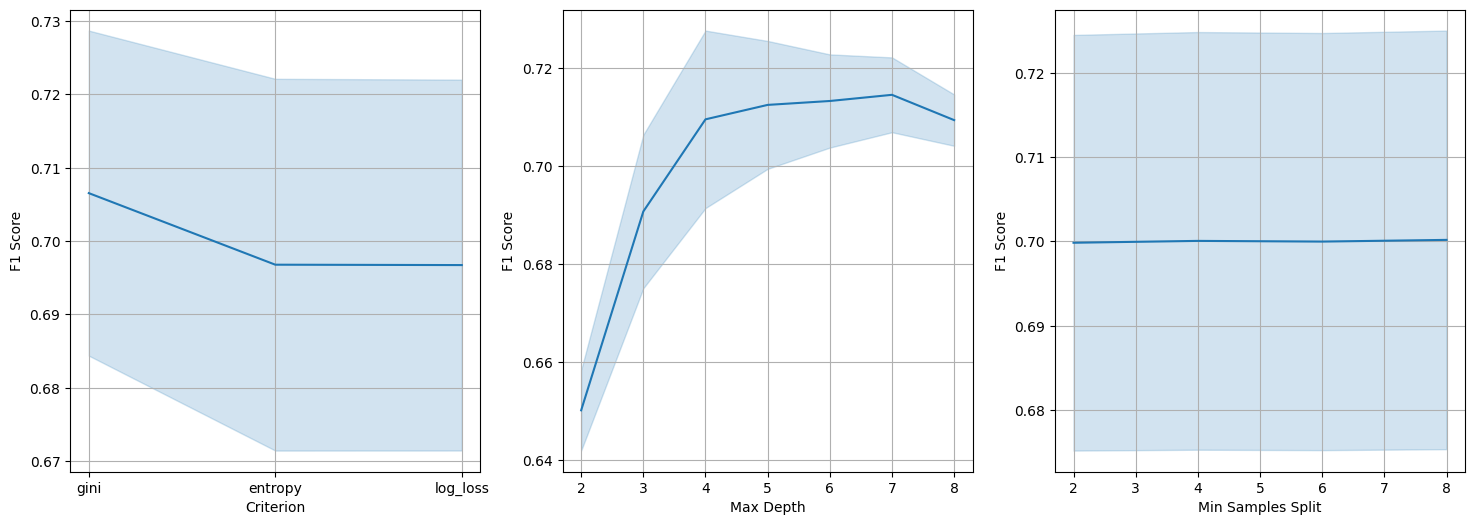

In [315]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sb.lineplot(data=cv_results_df, x='param_criterion', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Criterion')
plt.ylabel('F1 Score')
plt.grid()

plt.subplot(1, 3, 2)
sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid()

plt.subplot(1, 3, 3)
sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Min Samples Split')
plt.ylabel('F1 Score')
plt.grid()

finding the best model: this result is more mixed then the other ones, but overall it looks like max depth of 4 is most occuring, if not it is a number close. and default min sample split and criterion is most occuring also.

In [303]:
print(best_models_decision_tree)

[DecisionTreeClassifier(criterion='entropy', max_depth=4), DecisionTreeClassifier(max_depth=6), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(criterion='entropy', max_depth=7), DecisionTreeClassifier(max_depth=4)]


# evaluating the classifiers after round two


In [316]:
print("Random forest with original data")
rfc = RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90).fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))
print()
print("decision tree with original data: ")
decision_tree_best = DecisionTreeClassifier(max_depth=4).fit(train_val_features, train_val_targets)
print(evaluate(decision_tree_best, test_features, test_targets))



Random forest with original data
{'accuracy': 0.7853107344632768, 'precision': 0.7762999043143852, 'recall': 0.7853107344632768, 'f1': 0.7721496602094021, 'roc_auc': 0.8984604490144679}

decision tree with original data: 
{'accuracy': 0.7389830508474576, 'precision': 0.7412336671497067, 'recall': 0.7389830508474576, 'f1': 0.7259110791143315, 'roc_auc': 0.8500497502053278}


# Conclusion


The best model i have found is random forest with original data. For the second round this made more sense that it would be better then a regular decision tree, because random forest is build with many of those. it got higher score on everything and the results were pretty good.

the random forest can predict correctly predict the true positives and negatives most of the time and disdistinguishing between the classes in a very good way

# Sources

https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html: pipeline  
https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html:  ColumnTransformer  
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html randomforest  
https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.BernoulliNB.html bernoulli  
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html standard scaler  
